#### Data Collection

In [1]:
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
random.seed(42)
def generate_contract_type():
    contract_types = ["Two-Year", "One-Year", "Month-to-Month"]
    return random.choice(contract_types)
def generate_churn():
    churn_options = ["Yes", "No"]
    return random.choice(churn_options)
data = []

In [3]:
for customer_id in range(1001, 2001):
    gender = random.choice(["Male", "Female"])
    age = random.randint(18, 65)
    service_length = random.randint(1, 60)
    contract_type = generate_contract_type()
    monthly_charges = round(random.uniform(20, 200), 2)
    total_charges = round(monthly_charges * service_length, 2)
    churn = generate_churn()
    data.append([customer_id, gender, age, service_length, contract_type, monthly_charges, total_charges, churn])

In [4]:
column_names = ["CustomerID", "Gender", "Age", "ServiceLength (months)", "ContractType", 
                "MonthlyCharges (USD)", "TotalCharges (USD)", "Churn"]
df = pd.DataFrame(data, columns=column_names)
df.to_csv("data.csv", index=False)

In [5]:
df.head()

,CustomerID,Gender,Age,ServiceLength (months),ContractType,MonthlyCharges (USD),TotalCharges (USD),Churn
0,1001,Male,19,48,One-Year,64.08,3075.84,Yes
1,1002,Male,61,48,Month-to-Month,35.65,1711.20,No
2,1003,Male,19,6,Two-Year,61.88,371.28,Yes
3,1004,Male,63,42,Month-to-Month,118.09,4959.78,Yes
4,1005,Female,55,18,Two-Year,156.59,2818.62,Yes


#### Data Cleaning

In [6]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

#### Data Preprocessing

In [7]:
gender_encoder = LabelEncoder()
df['Gender'] = gender_encoder.fit_transform(df['Gender'])

In [8]:
churn_encoder = LabelEncoder()
df['Churn'] = churn_encoder.fit_transform(df['Churn'])

In [9]:
contract_encoder = LabelEncoder()
df['ContractType'] = contract_encoder.fit_transform(df['ContractType'])

In [10]:
numerical_cols = ['Age', 'ServiceLength (months)', 'MonthlyCharges (USD)', 'TotalCharges (USD)']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [11]:
df.head()

,CustomerID,Gender,Age,ServiceLength (months),ContractType,MonthlyCharges (USD),TotalCharges (USD),Churn
0,1001,1,-1.654328,1.068863,1,-0.879491,-0.085227,1
1,1002,1,1.345490,1.068863,0,-1.422341,-0.621500,0
2,1003,1,-1.654328,-1.422245,2,-0.921499,-1.148058,1
3,1004,1,1.488338,0.712991,0,0.151789,0.655120,1
4,1005,0,0.916944,-0.710500,2,0.886917,-0.186308,1


#### Exploratory Data Analysis

In [12]:
sns.set(style="whitegrid")

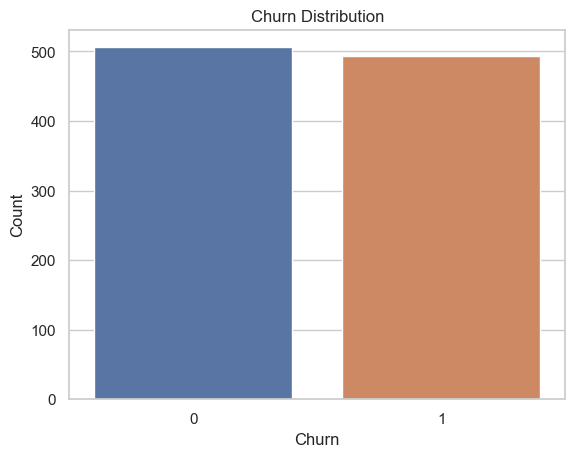

In [13]:
# Churn distribution
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

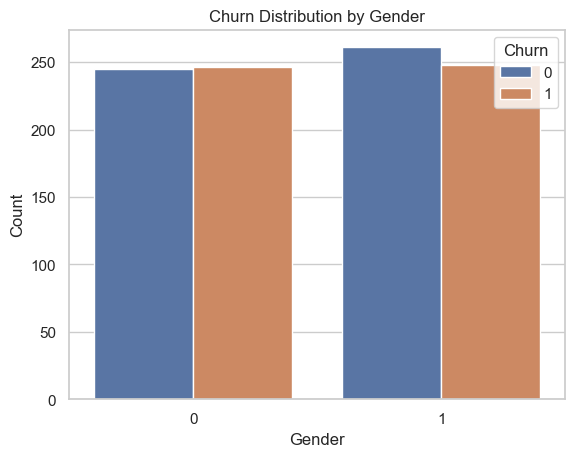

In [14]:
# Churn based on gender
sns.countplot(x="Gender", hue="Churn", data=df)
plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

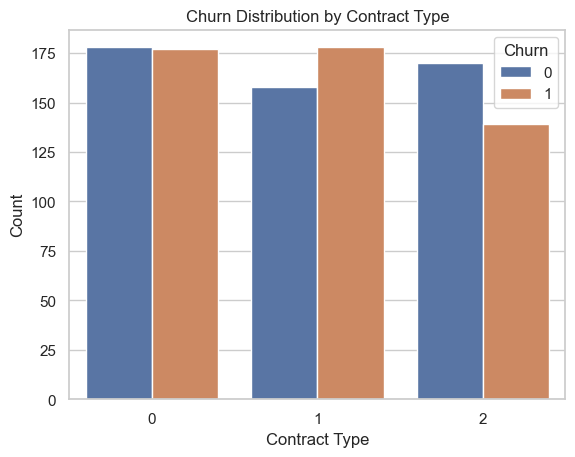

In [15]:
# Churn based on contract type
sns.countplot(x="ContractType", hue="Churn", data=df)
plt.title("Churn Distribution by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

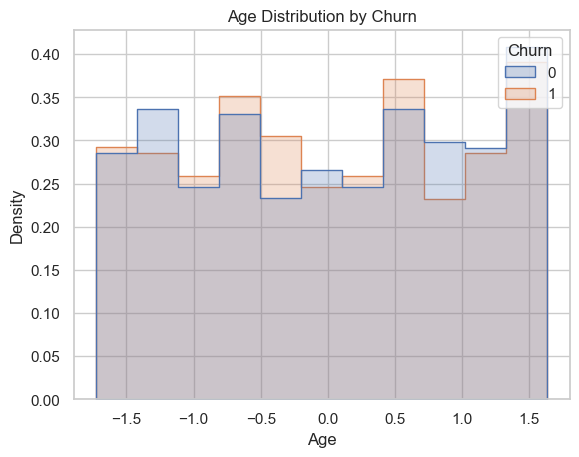

In [16]:
# Age distribution for churned and non-churned customers
sns.histplot(data=df, x="Age", hue="Churn", element="step", stat="density", common_norm=False)
plt.title("Age Distribution by Churn")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

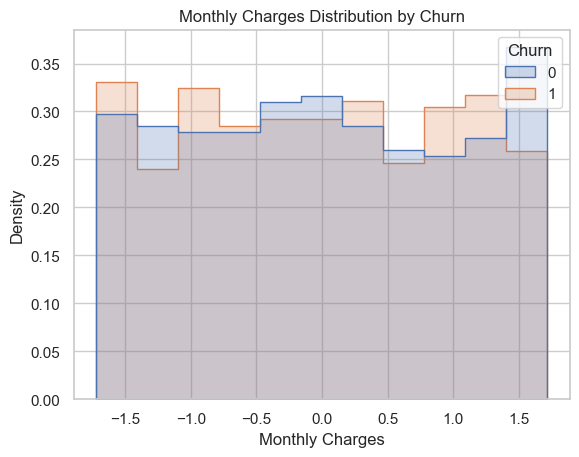

In [17]:
# Monthly charges distribution for churned and non-churned customers
sns.histplot(data=df, x="MonthlyCharges (USD)", hue="Churn", element="step", stat="density", common_norm=False)
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()

#### Churn Prediction

In [18]:
# Split data into features (X) and target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Make predictions
y_pred = model.predict(X_test)

In [22]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [23]:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.50      0.51       109
           1       0.44      0.48      0.46        91

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

